In [1]:
%pip install teeplot
from teeplot import teeplot as tp


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# OSF identifiers
consolidating_trie_id = "85nhu"
searchtable_id = "6k5jn"
niave_trie_id = "4egpc"

# Load CSV files into DataFrames directly from OSF URLs
consolidating_trie_df = pd.read_csv(f"https://osf.io/{consolidating_trie_id}/download")
searchtable_df = pd.read_csv(f"https://osf.io/{searchtable_id}/download")
niave_trie_df = pd.read_csv(f"https://osf.io/{niave_trie_id}/download")

# Add 'Type' column to each DataFrame, organizing
consolidating_trie_df['Type'] = 'Consolidating Trie'
searchtable_df['Type'] = 'Search Table'
niave_trie_df['Type'] = 'Naive Trie'

# Rename columns for consistency
consolidating_trie_df.rename(columns={'Real Time (s)': 'run_time', 'CPU Time (s)': 'cpu_time', 'Selection Type': 'selection_type'}, inplace=True)
searchtable_df.rename(columns={'Real Time (s)': 'run_time', 'CPU Time (s)': 'cpu_time', 'Selection Type': 'selection_type'}, inplace=True)
niave_trie_df.rename(columns={'Real Time (s)': 'run_time', 'CPU Time (s)': 'cpu_time', 'Selection Type': 'selection_type'}, inplace=True)

# Concatenate all DataFrames, easier to plot after
combined_df = pd.concat([consolidating_trie_df, searchtable_df, niave_trie_df])

# Define number of tips for each selection type, normalizing
num_tips = {'nk_tournamentselection': 17, 'nk_lexicaseselection': 233, 'nk_ecoeaselection': 492}

# Normalize run_time and cpu_time by number of tips
combined_df['num_tips'] = combined_df['selection_type'].map(num_tips)
combined_df['normalized_run_time'] = combined_df['run_time'] / combined_df['num_tips']
combined_df['normalized_cpu_time'] = combined_df['cpu_time'] / combined_df['num_tips']


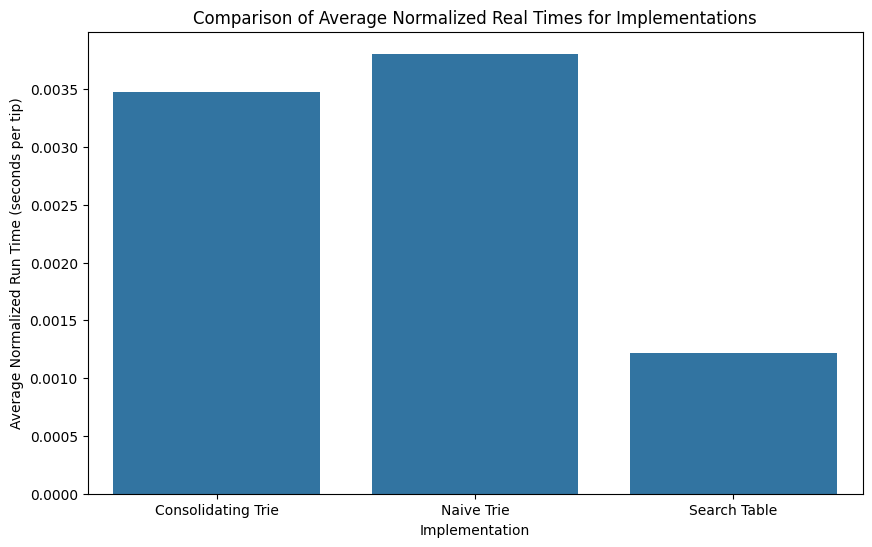

teeplots/viz=custom-barplot-real+x=type+y=normalized-run-time+ext=.pdf
teeplots/viz=custom-barplot-real+x=type+y=normalized-run-time+ext=.png


<Figure size 640x480 with 0 Axes>

In [3]:
# Create a bar chart to compare average normalized run times
avg_normalized_run_time = combined_df.groupby('Type')['normalized_run_time'].mean().reset_index()

def custom_barplot_real(data, x, y):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=data)
    plt.title('Comparison of Average Normalized Real Times for Implementations')
    plt.xlabel('Implementation')
    plt.ylabel('Average Normalized Run Time (seconds per tip)')
    plt.show()

# Use tp.tee() to call the custom function and save the plot
tp.tee(custom_barplot_real, data=avg_normalized_run_time, x='Type', y='normalized_run_time')


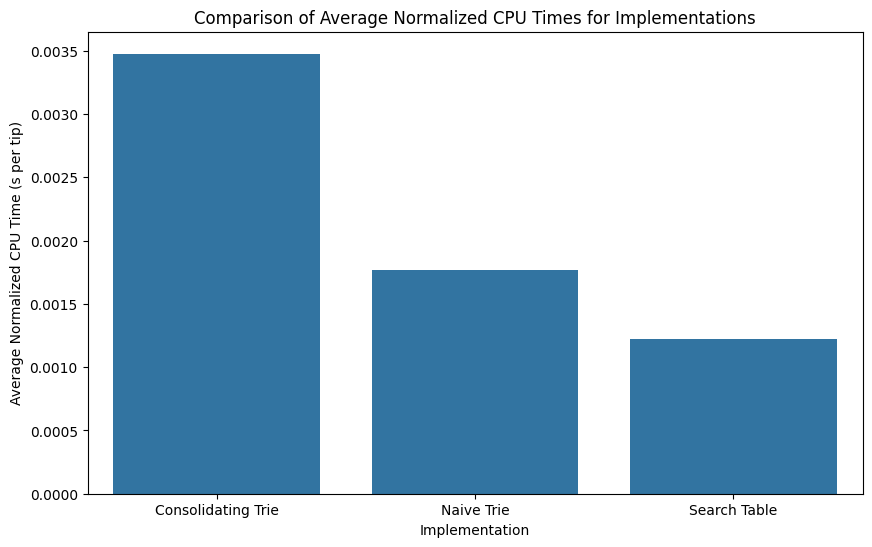

teeplots/viz=custom-barplot-cpu+x=type+y=normalized-cpu-time+ext=.pdf
teeplots/viz=custom-barplot-cpu+x=type+y=normalized-cpu-time+ext=.png


<Figure size 640x480 with 0 Axes>

In [4]:
# Create a bar chart to compare average normalized CPU times
avg_normalized_cpu_time = combined_df.groupby('Type')['normalized_cpu_time'].mean().reset_index()

def custom_barplot_cpu(data, x, y):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=data)
    plt.title('Comparison of Average Normalized CPU Times for Implementations')
    plt.xlabel('Implementation')
    plt.ylabel('Average Normalized CPU Time (s per tip)')
    plt.show()

# Use tp.tee() to call the custom function and save the plot
tp.tee(custom_barplot_cpu, data=avg_normalized_cpu_time, x='Type', y='normalized_cpu_time')
